In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
from sklearn import linear_model, metrics

pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)

%matplotlib inline
plt.style.use('ggplot')

In [41]:
#df = pd.read_csv('/Users/joshuagrossman/Desktop/DS-SF-23 Final Project/Kobe/kobe_clean_forest.csv')
df = pd.read_csv('/Users/joshuagrossman/DS-SF-23-work/kobe_clean_forest.csv')

In [42]:
df.head()

,shot_id,shot_made_flag,seconds_from_period_end,loc_x,loc_y,shot_distance,action_type#Jump Shot,home_away,action_type#Layup Shot,period#3,period#2,period#1,period#4,shot_zone_range#Less Than 8 ft.,game_month#1,game_month#3,game_month#2,game_month#12,game_month#4,game_month#11,playoffs,action_type#Running Jump Shot
0,1,NaN,0.878151,0.837349,0.138922,0.227848,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2,0.0,0.871148,0.186747,0.052695,0.189873,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,3,1.0,0.651261,0.299197,0.214371,0.202532,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,4,0.0,0.577031,0.779116,0.262275,0.278481,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,5,1.0,0.530812,0.502008,0.052695,0.000000,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [43]:
df.shape

(30697, 22)

In [44]:
df.columns

Index([u'shot_id', u'shot_made_flag', u'seconds_from_period_end', u'loc_x',
       u'loc_y', u'shot_distance', u'action_type#Jump Shot', u'home_away',
       u'action_type#Layup Shot', u'period#3', u'period#2', u'period#1',
       u'period#4', u'shot_zone_range#Less Than 8 ft.', u'game_month#1',
       u'game_month#3', u'game_month#2', u'game_month#12', u'game_month#4',
       u'game_month#11', u'playoffs', u'action_type#Running Jump Shot'],
      dtype='object')

In [45]:
df.count()

shot_id                            30697
shot_made_flag                     25697
seconds_from_period_end            30697
loc_x                              30697
loc_y                              30697
shot_distance                      30697
action_type#Jump Shot              30697
home_away                          30697
action_type#Layup Shot             30697
period#3                           30697
period#2                           30697
period#1                           30697
period#4                           30697
shot_zone_range#Less Than 8 ft.    30697
game_month#1                       30697
game_month#3                       30697
game_month#2                       30697
game_month#12                      30697
game_month#4                       30697
game_month#11                      30697
playoffs                           30697
action_type#Running Jump Shot      30697
dtype: int64

In [46]:
#Create a new df (df2) based on the blanks in the shot_made_flag
#This ceates a new DF of all the records where shot_made_flag is not null
df2 = df[df.shot_made_flag.notnull()]

In [47]:
df2.count()

shot_id                            25697
shot_made_flag                     25697
seconds_from_period_end            25697
loc_x                              25697
loc_y                              25697
shot_distance                      25697
action_type#Jump Shot              25697
home_away                          25697
action_type#Layup Shot             25697
period#3                           25697
period#2                           25697
period#1                           25697
period#4                           25697
shot_zone_range#Less Than 8 ft.    25697
game_month#1                       25697
game_month#3                       25697
game_month#2                       25697
game_month#12                      25697
game_month#4                       25697
game_month#11                      25697
playoffs                           25697
action_type#Running Jump Shot      25697
dtype: int64

In [48]:
#We'll still need to reserve the 5,000 blank records to submit to Kaggle if needed
df_testing = df[df.shot_made_flag.isnull()]

df_testing.shape

(5000, 22)

In [49]:
#Splitting the dataset into train and test
#60% of the dataset to train the model; the rest to test the model

train_df = df2.sample(frac = .6, random_state = 0).sort_index()

train_df.shape

(15418, 22)

In [50]:
test_df = df2.drop(train_df.index)

test_df.shape

(10279, 22)

In [51]:
names_X = ['seconds_from_period_end', 'loc_x', 'loc_y', 'shot_distance','action_type#Jump Shot', 
           'home_away', 'action_type#Layup Shot','period#3', 'period#2', 'period#1', 'period#4',
            'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#3','game_month#2', 
           'game_month#12', 'game_month#4', 'game_month#11','playoffs', 'action_type#Running Jump Shot']

#Try fewer variables:
#names_X = ['seconds_from_period_end', 'loc_x', 'loc_y', 'shot_distance', 'action_type#Jump Shot', 
#          'action_type#Layup Shot', 'shot_zone_range#Less Than 8 ft.', 'action_type#Running Jump Shot']

def X_y(df2):
    X = df2[ names_X ]
    y = df2.shot_made_flag
    return X, y

train_X, train_y = X_y(train_df)
test_X, test_y = X_y(test_df)

In [52]:
print train_X.shape
print test_X.shape

(15418, 20)
(10279, 20)


In [53]:
print train_y.shape
print test_y.shape

(15418,)
(10279,)


In [54]:
#Fit the model and print coefficients
model = linear_model.LogisticRegression()
model.fit(train_X, train_y)

print 'intercept    =', model.intercept_
print 'coefficients =', model.coef_

intercept    = [ 0.67527978]
coefficients = [[ 0.18525697  0.19626993  0.34045179 -0.74328434 -1.44161639  0.0658741
  -1.43355879 -0.02274663 -0.01235641  0.09511991 -0.10463339  0.11935883
  -0.02957639 -0.09673209 -0.06727961 -0.07026368 -0.05249482 -0.0949537
  -0.08395752  0.24758376]]


In [55]:
zip(names_X, np.exp(model.coef_[0]) - 1)

[('seconds_from_period_end', 0.20352767200749655),
 ('loc_x', 0.21685532254982354),
 ('loc_y', 0.40558248163650279),
 ('shot_distance', -0.52445051773788509),
 ('action_type#Jump Shot', -0.76345489930109811),
 ('home_away', 0.068092236634681225),
 ('action_type#Layup Shot', -0.76154121488734439),
 ('period#3', -0.022489875083736011),
 ('period#2', -0.012280382317286342),
 ('period#1', 0.099790719235509417),
 ('period#4', -0.099345348687037038),
 ('shot_zone_range#Less Than 8 ft.', 0.12677416203319836),
 ('game_month#1', -0.029143286086096287),
 ('game_month#3', -0.092200813787865932),
 ('game_month#2', -0.065066255701900833),
 ('game_month#12', -0.067851997456584434),
 ('game_month#4', -0.051140768554104987),
 ('game_month#11', -0.090584964888268282),
 ('playoffs', -0.080529683358223192),
 ('action_type#Running Jump Shot', 0.28092664403942558)]

In [56]:
# sort to looks at the values; pay attention to negative coefficients!
sorted(zip(abs(np.exp(model.coef_[0]) - 1), names_X))

[(0.012280382317286342, 'period#2'),
 (0.022489875083736011, 'period#3'),
 (0.029143286086096287, 'game_month#1'),
 (0.051140768554104987, 'game_month#4'),
 (0.065066255701900833, 'game_month#2'),
 (0.067851997456584434, 'game_month#12'),
 (0.068092236634681225, 'home_away'),
 (0.080529683358223192, 'playoffs'),
 (0.090584964888268282, 'game_month#11'),
 (0.092200813787865932, 'game_month#3'),
 (0.099345348687037038, 'period#4'),
 (0.099790719235509417, 'period#1'),
 (0.12677416203319836, 'shot_zone_range#Less Than 8 ft.'),
 (0.20352767200749655, 'seconds_from_period_end'),
 (0.21685532254982354, 'loc_x'),
 (0.28092664403942558, 'action_type#Running Jump Shot'),
 (0.40558248163650279, 'loc_y'),
 (0.52445051773788509, 'shot_distance'),
 (0.76154121488734439, 'action_type#Layup Shot'),
 (0.76345489930109811, 'action_type#Jump Shot')]

In [57]:
#make predictions on the test set
y_pred = model.predict(test_X)

# compare actual response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(test_y, y_pred)

0.678859811266


In [58]:
print 'training classifier score =', model.score(train_X, train_y)
print 'testing  classifier score =', model.score(test_X, test_y)

training classifier score = 0.678622389415
testing  classifier score = 0.678859811266


In [59]:
#10-fold cross validation 

c_df = pd.DataFrame({'index': np.linspace(-10, 10, 21)})

c_df['c'] = c_df['index'].apply(lambda index: 10 ** index)

def optimize_c(c):
    model = linear_model.LogisticRegression(C = c)
    return cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

c_df['Score'] = c_df.c.apply(optimize_c)

In [60]:
c_df

,index,c,Score
0,-10.0,1.000000e-10,0.555390
1,-9.0,1.000000e-09,0.555390
2,-8.0,1.000000e-08,0.555390
3,-7.0,1.000000e-07,0.555390
4,-6.0,1.000000e-06,0.555390
5,-5.0,1.000000e-05,0.555390
6,-4.0,1.000000e-04,0.555390
7,-3.0,1.000000e-03,0.653910
8,-2.0,1.000000e-02,0.677451
9,-1.0,1.000000e-01,0.678618


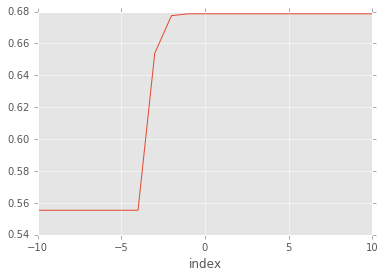

In [61]:
c_df.set_index('index').Score.plot()

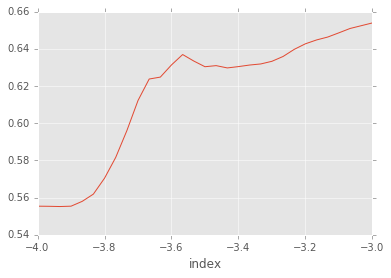

In [62]:
c_df = pd.DataFrame({'index': np.linspace(-4, -3, 31)})

c_df['c'] = c_df['index'].apply(lambda index: 10 ** index)

def optimize_c(c):
    model = linear_model.LogisticRegression(C = c)
    return cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

c_df['Score'] = c_df.c.apply(optimize_c)

c_df.set_index('index').Score.plot()

In [63]:
model = linear_model.LogisticRegression(C = 10 ** -3.0)
model.fit(train_X, train_y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
zip(np.exp(model.coef_[0]) - 1, names_X)

[(0.052394351245449888, 'seconds_from_period_end'),
 (0.02635484403667987, 'loc_x'),
 (-0.045419428339045553, 'loc_y'),
 (-0.06573315626416909, 'shot_distance'),
 (-0.41768927255254584, 'action_type#Jump Shot'),
 (0.041456045366914607, 'home_away'),
 (-0.1661307731475663, 'action_type#Layup Shot'),
 (0.0073511109579225131, 'period#3'),
 (-0.0044430923503947506, 'period#2'),
 (0.059011455434518467, 'period#1'),
 (-0.046312931237967647, 'period#4'),
 (0.20766266199690797, 'shot_zone_range#Less Than 8 ft.'),
 (0.018308204527486271, 'game_month#1'),
 (-0.0098172335872932504, 'game_month#3'),
 (0.0051011223461965294, 'game_month#2'),
 (0.0026826313362799947, 'game_month#12'),
 (0.0021979078197658097, 'game_month#4'),
 (-0.0057497210166578272, 'game_month#11'),
 (-0.003206155544266398, 'playoffs'),
 (0.089190194813539847, 'action_type#Running Jump Shot')]

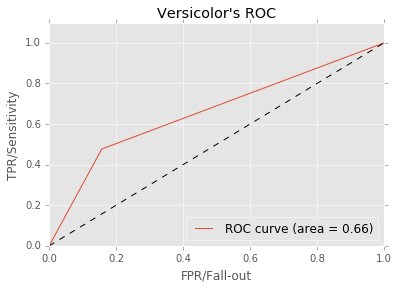

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Versicolor's ROC")
plt.legend(loc = 'lower right')
plt.show()

In [66]:
metrics.roc_auc_score(test_y, y_pred)

0.66000616436233295